<a href="https://www.kaggle.com/code/tylercortez/assessment-1-video-game-sales?scriptVersionId=274700233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression

## 1st Step: Impoting libraries


In [1]:
#Adding all the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2nd Step: Adding a global visual style

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

## 3rd Step: Loading the dataset

In [3]:
#Loading the dataset
data = pd.read_csv("/kaggle/input/video-game-sales/vgsales.csv")

#Showing some rows
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 4th Step: Checking the data

In [4]:
#Checking the dataset shape and the missing values
print("Dataset shape:", data.shape)
print("\nMissing values in each columns:\n", data.isnull().sum())

#Quick check at data types
data.info()

Dataset shape: (16598, 11)

Missing values in each columns:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4

## 5th Step: Cleaning the data

In [5]:
#Removing rows that are missing values
data = data.dropna()
#Keeping the only useful columns
data = data[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

## 6th Step: Choosing  the feature and target

In [6]:
#Defining the input features and the target variable
X = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [7]:

data = data.dropna()

data.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37


In [8]:
data.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

## 7th Step: Spliting up the data into training and testing

In [9]:
#Spliting the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8th Step: Training the model 

In [10]:
#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 9th Step: Making the predictions

In [11]:
#Using the model from earlier to make predictions
predictions = model.predict(X_test)

## 10th Step: Evaluating the model

In [12]:
#We calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.6f}")
print(f"R² Score: {r2:.6f}")

Mean Squared Error: 0.000029
R² Score: 0.999993


## 11th Step: Visualizing the data

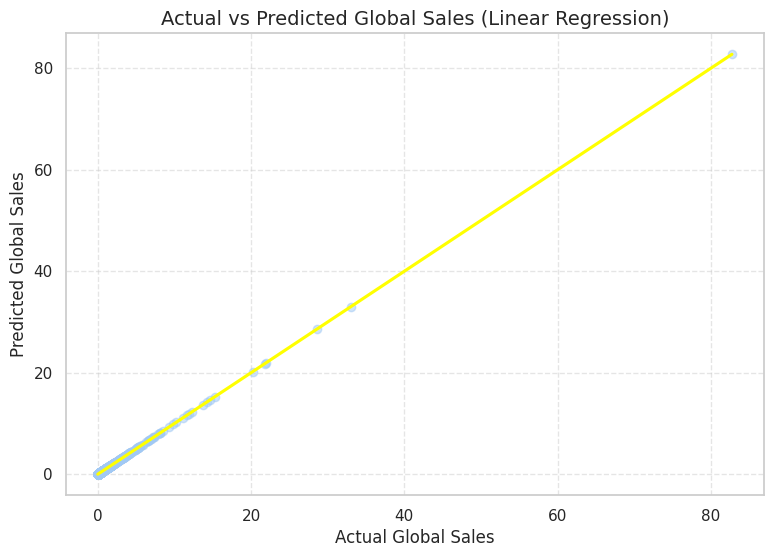

In [13]:
#Create a scatter plot of actual vs predicted sales
plt.figure(figsize=(9, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={"alpha":0.5}, line_kws={"color":"yellow"})
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales (Linear Regression)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

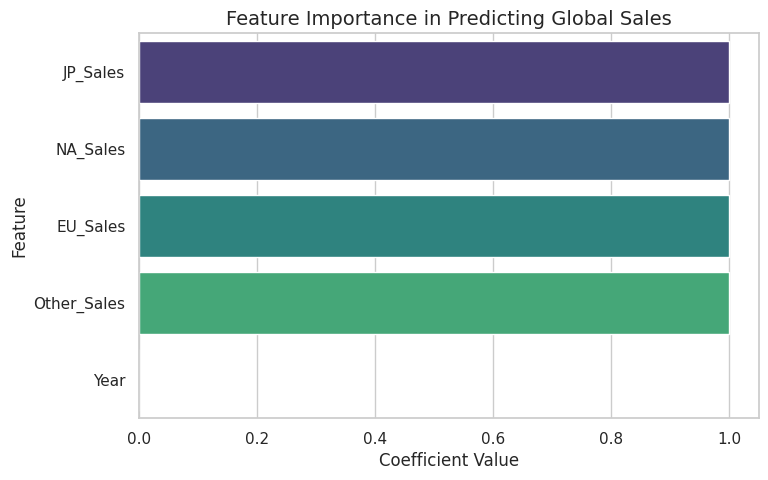

In [14]:
#visualize feature importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance in Predicting Global Sales")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

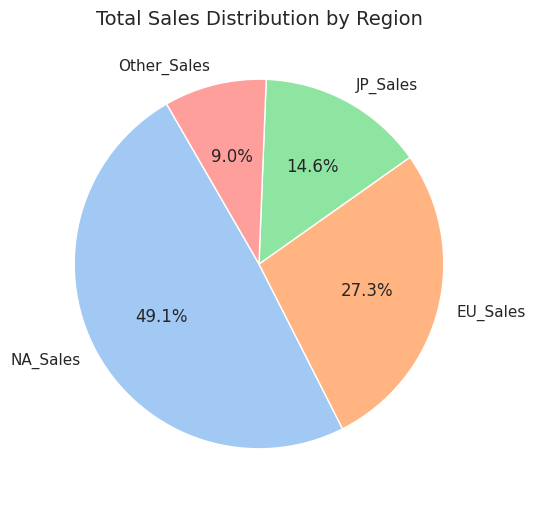

In [15]:
#pie chart to show total sales distribution by each region
region_sales = data[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", startangle=120, colors=sns.color_palette("pastel"))
plt.title("Total Sales Distribution by Region")
plt.show()

In [16]:
#A few comparison of actual and prediction
comparison = pd.DataFrame({
    "Actual Global Sales": y_test.values[:10],
    "Predicted Global Sales": predictions[:10]
})

comparison

,Actual Global Sales,Predicted Global Sales
0,0.57,0.570268
1,0.07,0.060290
2,0.19,0.190303
3,0.67,0.670217
4,0.22,0.220344
5,0.11,0.110319
6,0.17,0.170296
7,0.13,0.130325
8,0.02,0.020338
9,0.21,0.210330


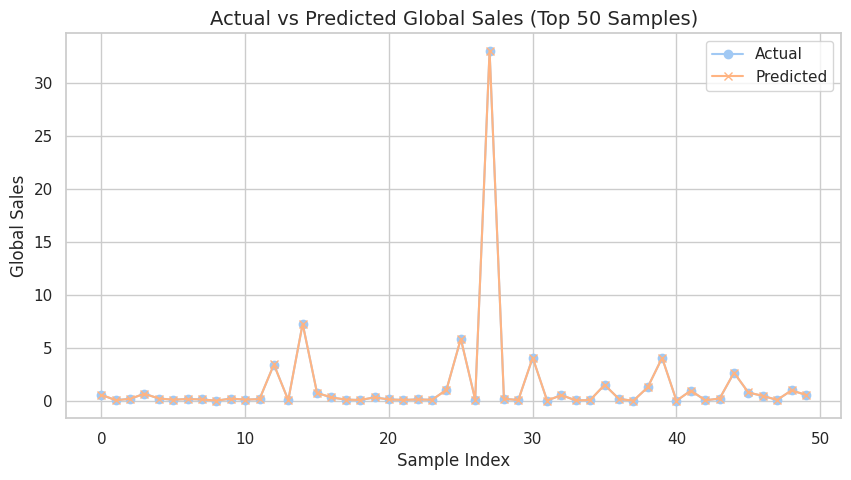

In [17]:
#This is one for a cleaner line chart of actual and prediction
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(predictions[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted Global Sales (Top 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Global Sales")
plt.legend()
plt.grid(True)
plt.show()

## 12th Step: Reflection

For this first part of my experiment i match my model to Linear Regression to make my model predict the sales of video games around the world. My objective was to see how video games in different regions influence the sales around the world. I used a dataset that are filled with datas consist of video game sales around the world from Kaggle like year of release, platform, and regional sales. 

The first thing I did before i trained my model was to clean my dataset by taking off all the missing values and choosing numeric columns. After that I separated the data into two testing and training to check the performance. Then I train this model, I checked how accurate the MSE and r2 score. The r2 of this model showed a high score close to 1.0. And it showed that this model can predict the global sales around the world perfectly. 

When I saw the result I thought my model was excellent until I checked it further, I discovered that discovered that global sales are the sum of all regional sales that made the prediction easier. Meaning my model was learning mathematical relationship than discovering new perceptions. This discovery helped me to see and understand how different model that learns real patterns and the one that fits obvious data. 

I also added visualizations to make it easier and clear to see for example scatter plots for predicted sales, actual sales, and a bar chart that shows what regions has the most influence. All these visuals helped this experiment to look professional and easier to explain and see.

In summary, This model helped me learn how to train, test, end evaluate a linear regression model correctly. I also learned how Linear Regression predict trends in datas and how to intrepet metrics like MSE and r2. The main thing for this conclusion is that this model accuracy should be look at very seriously, sometimes perfect number or score doesn't mean the model is perfect. If I redo this experiment, I would try using a different target or data, like about sales in a specific region, to make this experiment more challenging and realistc 

# Logistic Regression

## Step 1: Preparing the data

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the one with numeric columns
data = pd.read_csv("/kaggle/input/video-game-sales/vgsales.csv")

# Creating a Hit column to make this work
# If the game (Global_Sales) hit is greater than 1 million, it's a hit (1), if not it's 0
data["Hit"] = (data["Global_Sales"] > 1).astype(int)

# Choosing what features and what's the target
x = data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Hit"]

# Now spliting data to training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Step 2: Training the model

In [19]:
# This part will teach the model on how to find patterns
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Step 3 Making predictions

In [20]:
# Purpose of this one is to see how it can guess correctly
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100,2), "%")

Accuracy: 99.76 %


## Step 4: Visualization

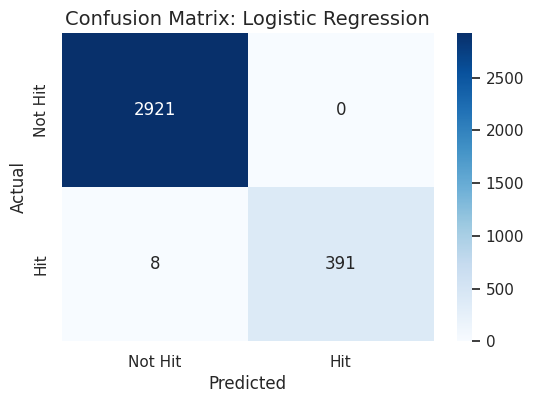

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Hit", "Hit"], yticklabels=["Not Hit", "Hit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

## Step 5: Checking if the feature matter the most

In [22]:
print(y.unique())
print(len(y.unique()))

[1 0]
2


In [23]:
print("X columns:", len(X.columns))
print("Model coef shape:", model.coef_.shape)

X columns: 5
Model coef shape: (1, 4)


In [24]:
print("Features used:", X.columns.tolist())
x.info()

Features used: ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 518.8 KB


In [25]:
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data = data.dropna(subset=["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])
X = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = (data["Global_Sales"] > 1).astype(int) 

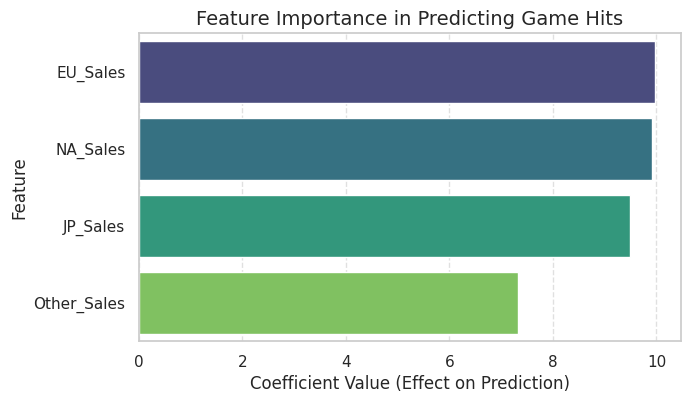

       Feature  Coefficient
1     EU_Sales     9.979410
0     NA_Sales     9.910794
2     JP_Sales     9.485091
3  Other_Sales     7.318837


In [26]:
# Creating a DataFrame
coefs = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Nicely plot
plt.figure(figsize=(7,4))
sns.barplot(data=coefs, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance in Predicting Game Hits")
plt.xlabel("Coefficient Value (Effect on Prediction)")
plt.ylabel("Feature")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.show()

# Displaying the coefficients
print(coefs)

In [27]:
predictions = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
predictions["Predicted_Label"] = predictions["Predicted"].map({1: "Hit", 0: "Not Hit"})
print(predictions.head(60))

       Actual  Predicted Predicted_Label
8928        0          0         Not Hit
4789        0          0         Not Hit
15492       0          0         Not Hit
14767       0          0         Not Hit
5211        0          0         Not Hit
720         1          1             Hit
4918        0          0         Not Hit
3107        0          0         Not Hit
7416        0          0         Not Hit
4447        0          0         Not Hit
2157        0          0         Not Hit
10762       0          0         Not Hit
12217       0          0         Not Hit
3421        0          0         Not Hit
11598       0          0         Not Hit
6945        0          0         Not Hit
9613        0          0         Not Hit
14478       0          0         Not Hit
10390       0          0         Not Hit
11298       0          0         Not Hit
409         1          1             Hit
8215        0          0         Not Hit
13017       0          0         Not Hit
327         1   

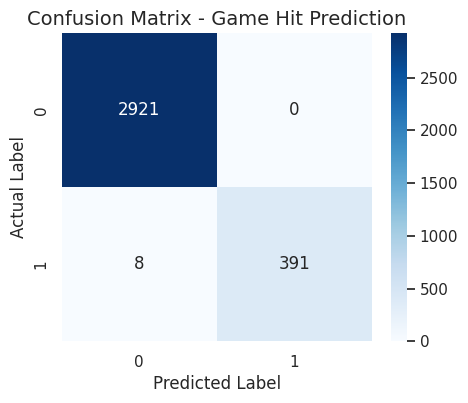

In [28]:
# To summarize the model
cm = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Game Hit Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

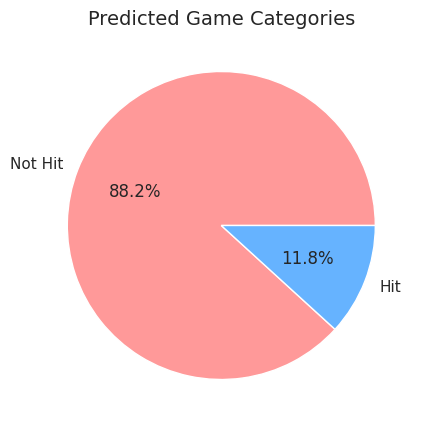

In [29]:
#Pie chart 
labels = ["Not Hit", "Hit"]
counts = pd.Series(y_pred).value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Predicted Game Categories")
plt.show()

## Step 6: Reflection

For this part I used logistic regression to see if a video game is a hit (1) or not a hit (0), and it's based on regional sales. Logistic regression works for classification issues, and it helps show a result like "yes" or "no," unlike linear regression, which predicts continuous values.

I first started developing the data and making the global sales into a binary variable, where values like 1 million sold are labeled as hits (1). I implemented a feature where North America, Europe, Japan, and other regions guess the outcome of sales. After that I divided the data into two training and testing sets, then trained my model by implementing scikit-learn's logistic regression function.

After I trained the model, I tested the accuracy with a classification report and implemented a confusion matrix. And the results were good, showing that the model has correctly checked what game is considered a hit or not a hit. And again I implemented a visualization to show which region had the biggest impact on a game's success. The model showed that Europe and North America are the strongest predictors, which makes sense given how big their market size is.

But after checking the results, I again realized the accuracy might be higher than what I'm expecting because the regional sales already have direct global sales. Meaning that the model doesn't have to guess that much because it is straightforward. This experiment helped me see that sometimes a high accuracy score doesn't mean the model is perfect; it can mean the dataset I picked makes the problem easy.

This experiment helped me learn how the process of building a classification model works, evaluating it with precision and recall, and how to interpret coefficients as indicators of features. I also now know how to see beyond accuracy and see what the model is truly learning. If I have to do this again, I would add another dataset or maybe change the problem definition to make the model more challenging; for instance, predicting the future hit game according to the early trends in sales or maybe non-sales, like genre or platforms.

# K-Means Clustering

## 1. Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 2. Loading dataset

In [31]:
# Load the dataset
df = pd.read_csv("/kaggle/input/video-game-sales/vgsales.csv")
df = df.dropna() # helps remove the rows with missing values
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 3. Choosing numeric features for clustering

In [32]:
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


## 4. Quick correlation check

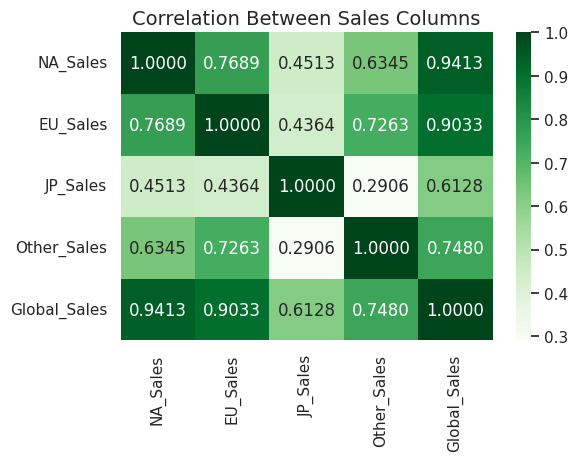

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="Greens", fmt=".4f")
plt.title("Correlation Between Sales Columns")
plt.show()

## 5. Scaling the data

In [34]:
# Scaling the dta features so that each columns are treated equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 6. Looking for a good number 

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

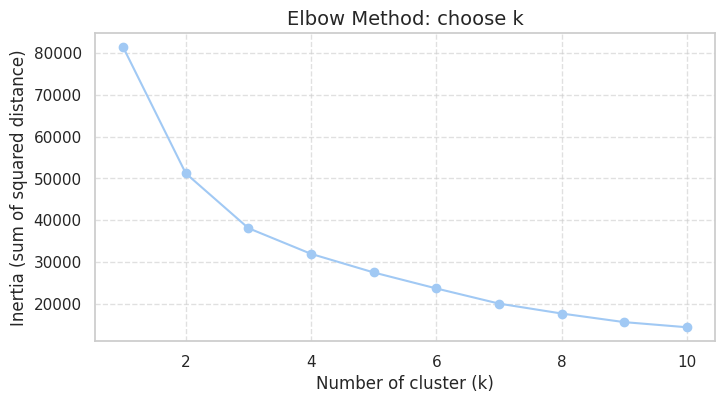

In [35]:
# Elbow method to choose k
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Inertia (sum of squared distance)")
plt.title("Elbow Method: choose k")
plt.grid(True,linestyle="--", alpha=0.6)
plt.show()


## 7. Training K-Means with a picked k

In [36]:
# Fitting KMeans with the chosen number of clusters
# Replacing n_clusters with whatever k are picked from the elbow plot
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Adding cluster labes for the original dataframe
df["Cluster"] = kmeans.labels_
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 8. How many games are in each cluster

Counts per cluster:
 Cluster
0    15603
1      641
2       46
3        1
Name: count, dtype: int64


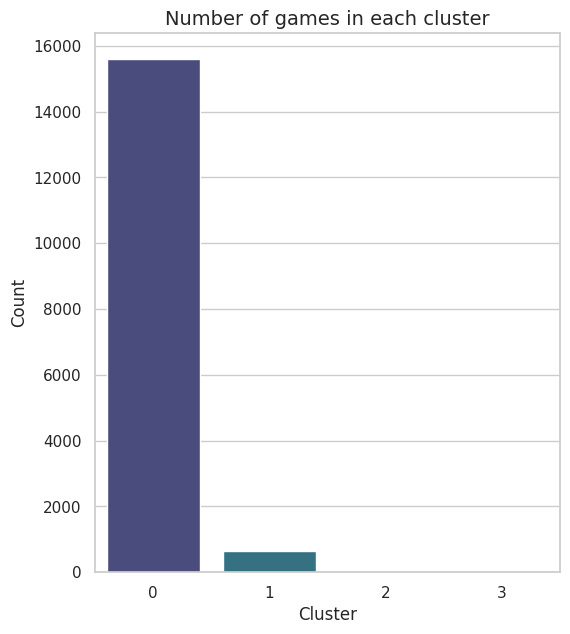

In [37]:
# Counting games per cluster
counts = df["Cluster"]. value_counts().sort_index()
print("Counts per cluster:\n", counts)

# Very simple bar chart
plt.figure(figsize=(6,7))
sns.countplot(x="Cluster", data=df, palette="viridis", order=range(k))
plt.title("Number of games in each cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

## 9. Cluster Summary

In [38]:
# Average sales per cluster
cluster_summary = df.groupby("Cluster")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].mean().round(3)
cluster_summary

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Cluster,,,,,
0,0.169,0.084,0.051,0.027,0.332
1,1.899,1.280,0.551,0.419,4.149
2,9.298,5.388,2.853,1.859,19.398
3,41.490,29.020,3.770,8.460,82.740


## 10. Visualize the clusters

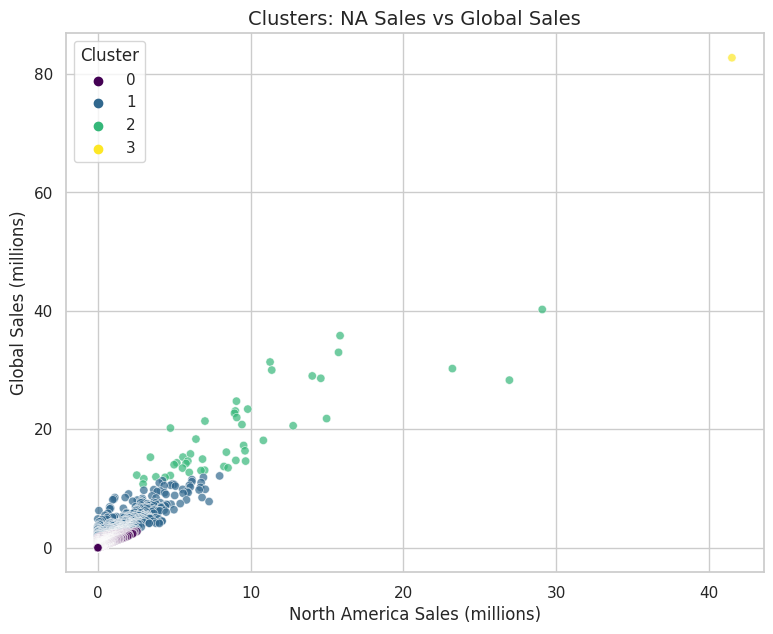

In [39]:
# Scattering all the plots for visualization clusters
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="NA_Sales", y="Global_Sales", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Clusters: NA Sales vs Global Sales")
plt.xlabel("North America Sales (millions)")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Cluster")
plt.show()


## 11. Pairwise cluster plots 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

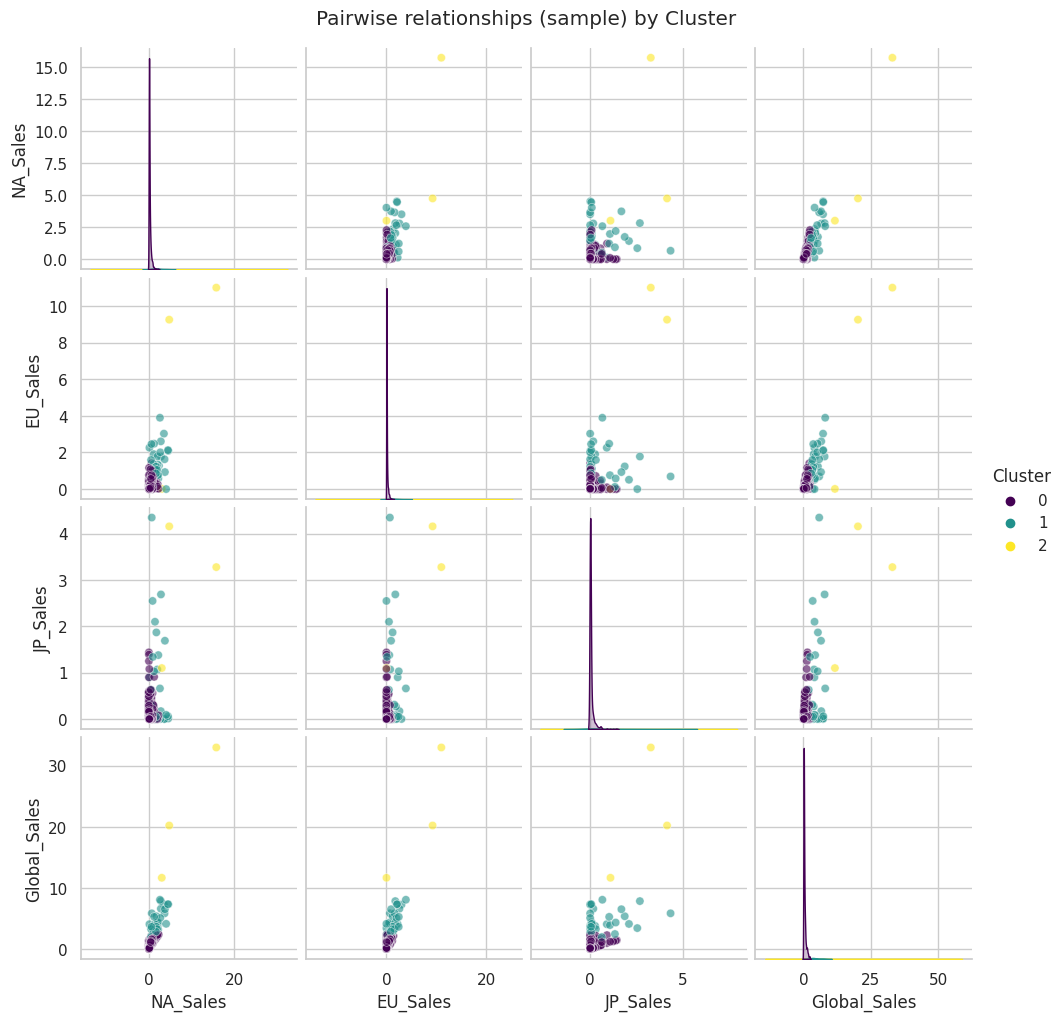

In [40]:
# Pairplot for a deeper comparison
sample = df.sample(n=1000, random_state=42)  # speeding it up
sns.pairplot(sample, vars=["NA_Sales","EU_Sales","JP_Sales","Global_Sales"], hue="Cluster", palette="viridis", plot_kws={'alpha':0.6})
plt.suptitle("Pairwise relationships (sample) by Cluster", y=1.02)
plt.show()


## 12. Showing example for every game per sales

In [41]:
# Sample game names from each cluster 
for i in range(k):
    print(f"\nCluster {i} sample games:")
    display(df[df["Cluster"]==i][["Name","Platform","Genre","Global_Sales"]].head(5))



Cluster 0 sample games:


,Name,Platform,Genre,Global_Sales
544,Missile Command,2600,Shooter,2.76
555,Madden NFL 12,X360,Sports,2.69
557,Madden NFL 11,X360,Sports,2.69
564,Mortal Kombat,GEN,Fighting,2.67
568,Fable,XB,Role-Playing,2.66



Cluster 1 sample games:


,Name,Platform,Genre,Global_Sales
43,Halo 3,X360,Shooter,12.14
46,Super Mario 64,N64,Platform,11.89
48,Super Mario Galaxy,Wii,Platform,11.52
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,11.33
50,Super Mario Land 2: 6 Golden Coins,GB,Adventure,11.18



Cluster 2 sample games:


,Name,Platform,Genre,Global_Sales
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.82
3,Wii Sports Resort,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
5,Tetris,GB,Puzzle,30.26



Cluster 3 sample games:


,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.74


## 13. Additional things to add

In [42]:
# Adding a silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Getting the cluster labels
labels = kmeans.labels_

# Calculating the silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 3))

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.845


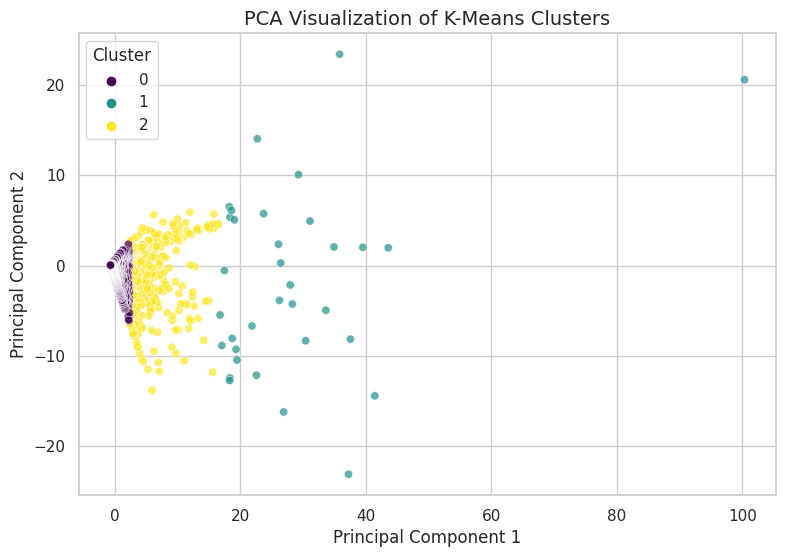

In [43]:
# Adding a 2d projection for clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="viridis", alpha=0.7)
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

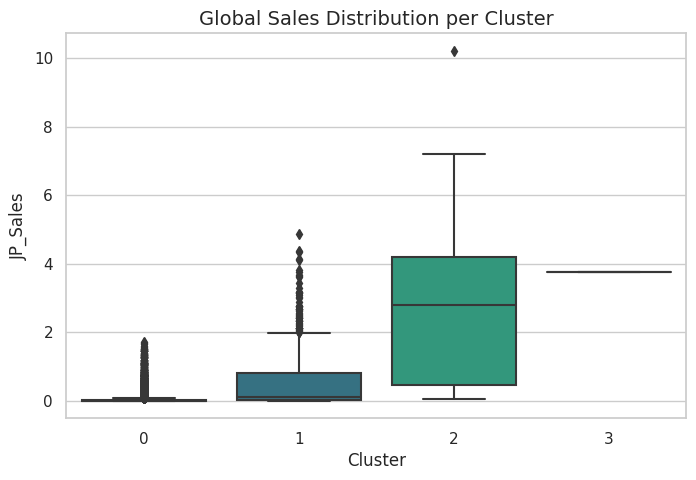

In [44]:
# Extra visualization for japan
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="JP_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

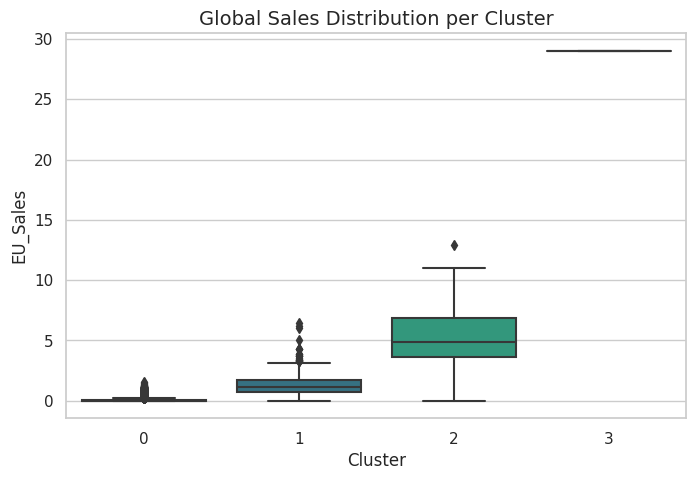

In [45]:
# Extra visualization for europe
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="EU_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

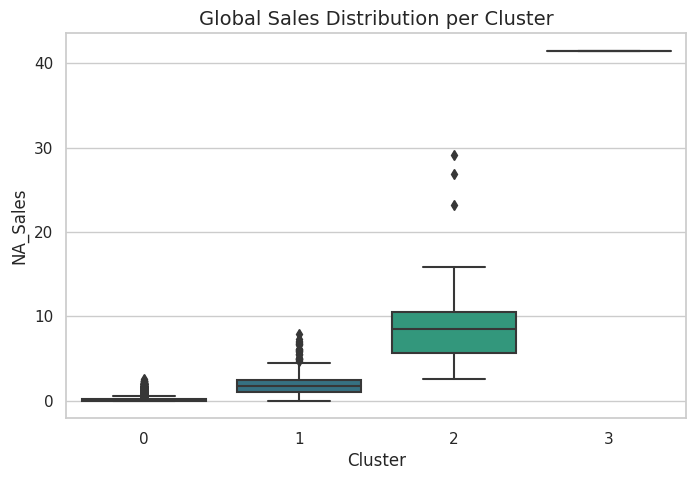

In [46]:
# Extra visualization for north america
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="NA_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

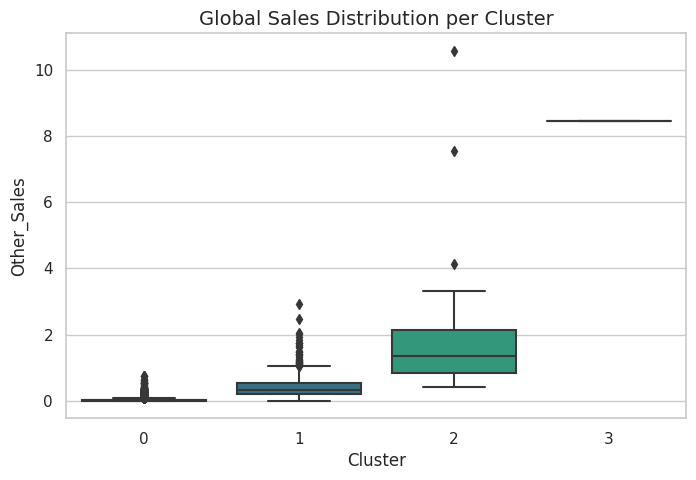

In [47]:
# Extra visualization for other regions
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Other_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

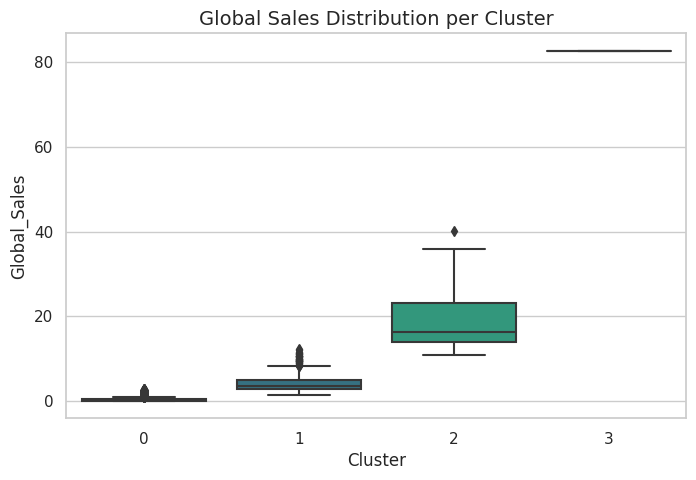

In [48]:
# Extra visualization for global sales
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Global_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

In [49]:
# Top games per clusters
for i in range(k):
    print(f"\nTop 3 games in Cluster {i}:")
    display(df[df["Cluster"]==i][["Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(3))



Top 3 games in Cluster 0:


,Name,Global_Sales
544,Missile Command,2.76
557,Madden NFL 11,2.69
555,Madden NFL 12,2.69



Top 3 games in Cluster 1:


,Name,Global_Sales
43,Halo 3,12.14
46,Super Mario 64,11.89
48,Super Mario Galaxy,11.52



Top 3 games in Cluster 2:


,Name,Global_Sales
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00



Top 3 games in Cluster 3:


,Name,Global_Sales
0,Wii Sports,82.74


## 14. Reflection

For this experiment I use K-Means Clustering to look for hidden patterns inside the video game sales data without using pre-labeled categories. This one is different because it helps to group all the same games by basing it on their sales around the world, while Linear and Logistic are only predicting a target variable. My objective was to see if the data can form a group, like global success games, hits, or even titles that didn't sell well. 

My first move in this experiment was setting up the model, but it was confusing because K-Means Clustering doesn't use "y-values" or any labeled column. It only works if it sees any similarities between features. I used different columns such as North America, Europe, Japan, and Other regions to help the model decide on how many clusters made the most sense. In order to see what number I implemented a method called the Elbow method, and it helped find the point that adding more clusters stops improving the results. In the end I decided to use a balanced number of clusters that show a clear separation in the visualizations.

After finishing training the model, I added a code Silhouette Score to see or measure how different the clusters are from each other. And the results came very strong, meaning all the groups are well defined and they are not overlapping that much. Also the PCA visualization contributed a lot in giving or showing the separation between clusters, and it made it easier to see or understand how the unique types of games were grouped together. This showed a combination of numeric and visual output, creating a clear image about how the data behaved.

Doing this experiment, I discovered that clustering doesn't always require labeled data to showcase inputs. Also, it showed me how important scaling features is before implementing K-Means, since different values can have an impact on the groupings. Regardless of the fact that the algorithm is not always about accuracy in the same way as classification, it still helped fit all the dataset into logical segments that show real-world trends. In summary, K-Means is a great tool for discovering patterns that are hidden inside the dataset, and because of this, I understand all the data from a broader, unsupervised perspective.